# Data wrangling and Exploratory Analysis on Healthcare Insurance

This dataset contains information on the relationship between personal attributes (age, gender, BMI, family size, smoking habits), geographic factors, and their impact on medical insurance charges. It can be used to study how these features influence insurance costs and develop predictive models for estimating healthcare expenses.

In [1]:
#importing libs
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Loading dataset

In [2]:
df = pd.read_csv('../Healthcare Insurance/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Inspecting the dataset

In [7]:
# Displaying basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Statistic view
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# shape of the dataframe
df.shape

(1338, 7)

## Handling Missing values

In [13]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## EDA

### Descriptive Questions
Descriptive Analysis:
- What is the distribution of age, BMI, and charges in the dataset?
- What is the average age, BMI, and charges of the insured individuals?
- How many individuals are smokers/non-smokers?
- What is the distribution of individuals across different regions?

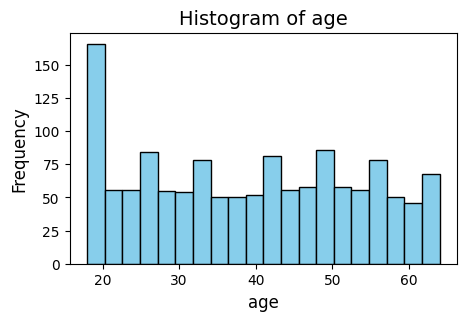

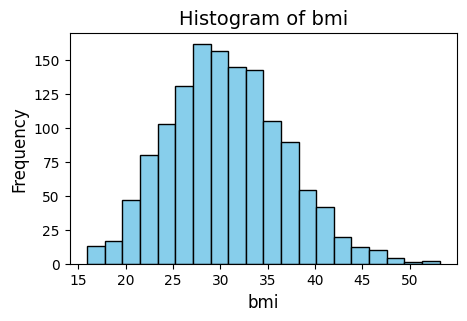

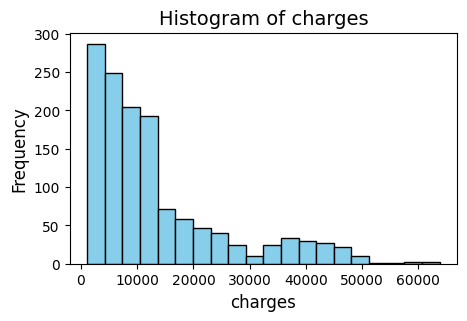

In [39]:
# What is the distribution of age, BMI, and charges in the dataset?

df_columns = df[['age', 'bmi','charges']]
def histView(df, df_columns):
    for i in df_columns:
        plt.figure(figsize=(5, 3))
        plt.hist(df[i], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {i}', fontsize=14)
        plt.xlabel(i, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.show()
histView(df, df_columns)

In [47]:
# What is the average age, BMI, and charges of the insured individuals?
df_columns = df[['age', 'bmi','charges']].mean()
df_columns

age           39.207025
bmi           30.663397
charges    13270.422265
dtype: float64

In [68]:
# How many individuals are smokers/non-smokers?
#Smokers_or_non_smokers = df.smoker.value_counts().sort_values(ascending=False)
Smokers_or_non_smokers = round(((df.smoker.value_counts()/len(df))*100))
                          
Smokers_or_non_smokers # 80% of the individuals dont smoke

smoker
no     80.0
yes    20.0
Name: count, dtype: float64

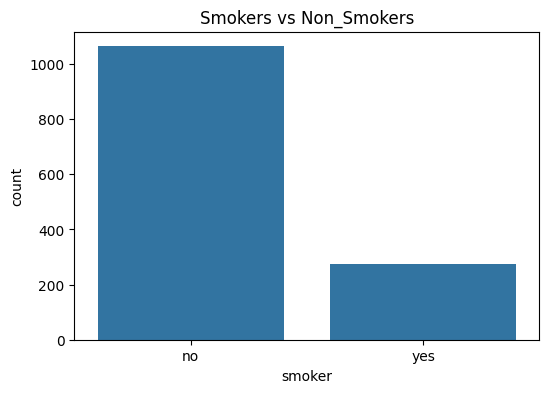

In [57]:
# plotting a bar of individuals that are smokers and non
plt.figure(figsize=(6, 4))
sns.barplot(data=df['smoker'].value_counts())
plt.title('Smokers vs Non_Smokers')
plt.show()

## 

<Figure size 500x400 with 0 Axes>

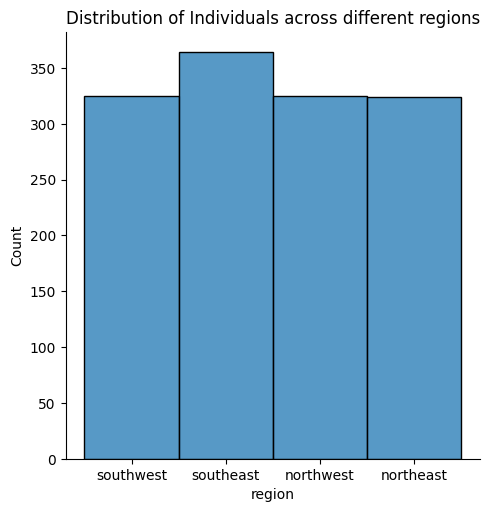

In [71]:
# What is the distribution of individuals across different regions?
plt.figure(figsize=(5,4))
sns.displot(data=df, x = df.region)
plt.title("Distribution of Individuals across different regions")
plt.show()

# the Most individuals are from the southeast region

### Relationships between Variables:

- Is there a correlation between age and charges?
- How does BMI vary with age?
- Are there differences in charges between smokers and non-smokers?
- How does the number of children affect insurance charges?

In [75]:
# Is there a correlation between age and charges?
correlation = df['age'].corr(df['age'])
correlation 
# 1.0 This indicates a perfect positive linear relationship,

1.0

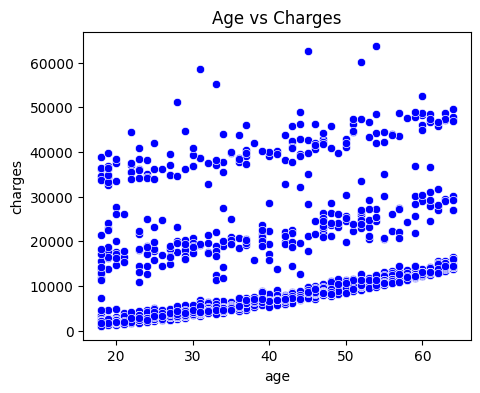

In [77]:
# plot a scatter plot to show this
plt.figure(figsize=(5,4))
sns.scatterplot(data=df, x = df.age, y=df.charges,color='blue')
plt.title("Age vs Charges")
plt.show()

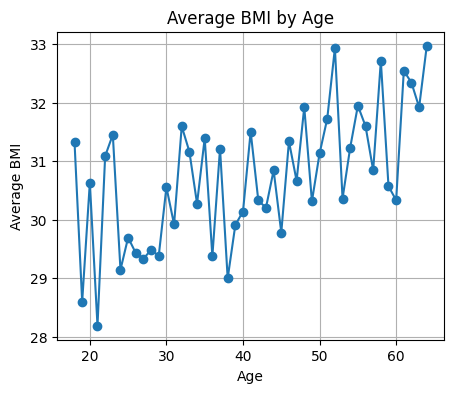

In [82]:
# How does BMI vary with age?
average_bmi_by_age = df.groupby('age').bmi.mean()
average_bmi_by_age
plt.figure(figsize=(5, 4))
plt.plot(average_bmi_by_age.index, average_bmi_by_age.values, marker='o', linestyle='-')
plt.title('Average BMI by Age')
plt.xlabel('Age')
plt.ylabel('Average BMI')
plt.grid(True)
plt.show()
# From the chart below, the older the individuals, the high their BMI.

In [96]:
# How does BMI differ between males and females?
diff_between_males_females = round(df.groupby('sex')['bmi'].mean())
diff_between_males_females
# males have a higher average of BMI = 31

sex
female    30.0
male      31.0
Name: bmi, dtype: float64

In [138]:
# Are there differences in charges between smokers and non-smokers?
diff = df.groupby('smoker').charges.mean()

#no      8434.268298
#yes    32050.231832

diff_between_smokers_non_smokers = diff.iloc[1] - diff.iloc[0]
(diff_between_smokers_non_smokers / diff.sum()) *100

# Yes. the difference is 58.33334599216905

58.33334599216905

In [11]:
# How does the number of children affect insurance charges?
average_charges_by_children = df.groupby('children')['charges'].mean()
average_charges_by_children

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

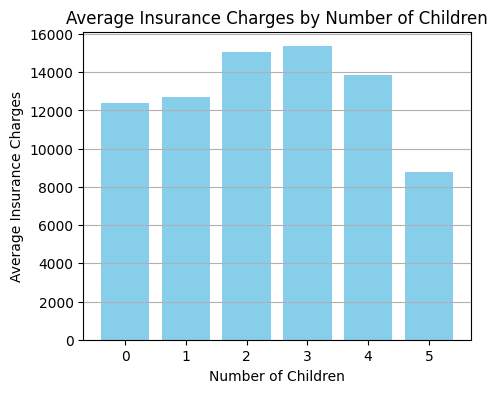

In [14]:
# Plotting the relationship between the number of children and average insurance charges
plt.figure(figsize=(5, 4))
plt.bar(average_charges_by_children.index, average_charges_by_children.values, color='skyblue')
plt.title('Average Insurance Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Insurance Charges')
plt.xticks(average_charges_by_children.index)
plt.grid(axis='y')
plt.show()

## Demographic Analysis:

- What is the average age and charges for males and females?
- How does BMI differ between males and females?
- Is there a difference in insurance charges based on regions?

In [20]:
# What is the average age and charges for males and females?
# average_age_charges_by_gender = df.groupby('sex')[['age', 'charges']].mean()
#df.head()
# average_age_charges_by_gender
average_age_charges_by_gender = round(df.groupby('sex').agg({'age': 'mean', 'charges': 'mean'}))
average_age_charges_by_gender

,age,charges
sex,,
female,40.0,12570.0
male,39.0,13957.0


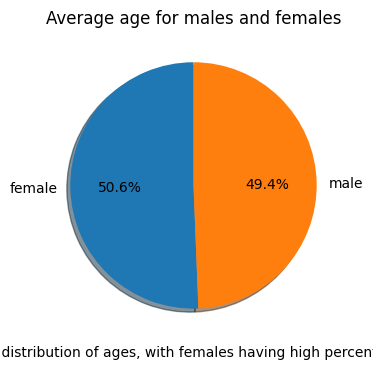

In [44]:
#Plotting the average age for males and females

plt.figure(figsize=(5, 4))
plt.pie(average_age_charges_by_gender['age'], labels=average_age_charges_by_gender.index, autopct='%1.1f%%',
       shadow=True, startangle=90)
plt.title('Average age for males and females')
plt.xlabel('% distribution of ages, with females having high percentage')
plt.show()


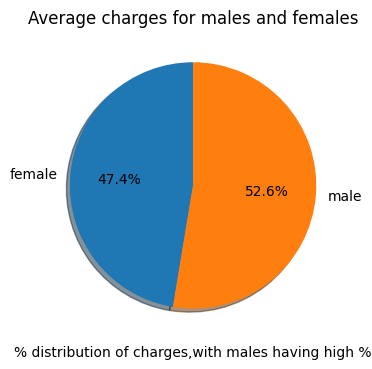

In [49]:
#Plotting the average charges for males and females

plt.figure(figsize=(5, 4))
plt.pie(average_age_charges_by_gender['charges'], labels=average_age_charges_by_gender.index, autopct='%1.1f%%',
       shadow=True, startangle=90)
plt.title('Average charges for males and females')
plt.xlabel('% distribution of charges,with males having high %')
plt.show()


In [68]:
# How does BMI differ between males and females?
bmi_differ_males_females = df.groupby('sex')['bmi'].mean()
final = round(((bmi_differ_males_females.iloc[0] - bmi_differ_males_females.iloc[1]) / bmi_differ_males_females.iloc[0]) *100)
final #the difference between sex is an average of 2%

# another solution
# df.groupby('sex').apply(lambda x: (x.iloc[0]['bmi'] - x.iloc[1]['bmi']) / x.iloc[0]['bmi'] * 100)


-2

In [76]:
# Is there a difference in insurance charges based on regions?
diff_charges_based_on_regions = df.groupby('region')['charges'].mean().sort_values(ascending=False)
diff_charges_based_on_regions

region
southeast    14735.411438
northeast    13406.384516
northwest    12417.575374
southwest    12346.937377
Name: charges, dtype: float64